## Uppgift E00

### Uppgift 0

## A

x-värden: [149.6714153   86.17356988 164.76885381 252.30298564  76.58466253
  76.58630431 257.92128155 176.74347292  53.05256141 154.25600436]
Finns det x-värden >= 300? True


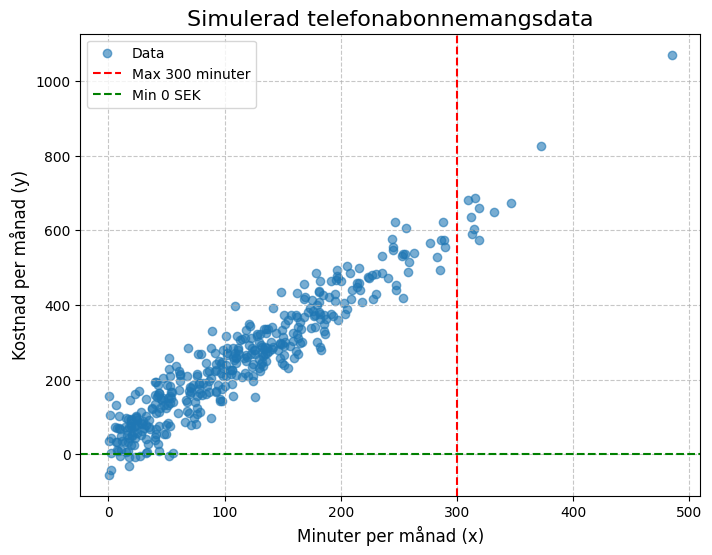

Antal datapunkter där x >= 300: 11
Antal datapunkter där y < 0: 8


In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Simulera data
np.random.seed(42)  # Sätt seed för reproducerbarhet
x = np.random.normal(100, 100, 400) 
x = np.abs(x)  # Simulera x-värden och ta absolutvärde
epsilon = np.random.normal(0, 50, 400)  # Simulera brus
y = 2 * x + 25 + epsilon  # Beräkna y-värden

# Visa de första 10 x-värdena
print("x-värden:", x[:10])

# Kontrollera om något x-värde är >= 300
print("Finns det x-värden >= 300?", np.any(x >= 300))

# Plotta datasetet
plt.figure(figsize=(8, 6))  # Anpassa storleken på plotten
plt.scatter(x, y, alpha=0.6, label='Data')

# Lägg till boundaries
plt.axvline(x=300, color='red', linestyle='--', label='Max 300 minuter')  # Vertikal linje vid x=300
plt.axhline(y=0, color='green', linestyle='--', label='Min 0 SEK')  # Horisontell linje vid y=0

plt.title("Simulerad telefonabonnemangsdata", fontsize=16)
plt.xlabel("Minuter per månad (x)", fontsize=12)
plt.ylabel("Kostnad per månad (y)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Räkna antalet datapunkter där x >= 300 och y < 0
x_over_300 = np.sum(x >= 300)
y_under_0 = np.sum(y < 0)

# Skriv ut resultaten
print(f"Antal datapunkter där x >= 300: {x_over_300}")
print(f"Antal datapunkter där y < 0: {y_under_0}")

Förklaring:

1: np.random.seed(42): Säkerställer att samma slumpmässiga värden genereras varje gång koden körs.

2: np.random.normal(100, 100, 400): Skapar 400 x-värden från en normalfördelning med medelvärde 100 och standardavvikelse 10.

3: np.abs(): Tar absolutvärdet av x-värdena för att undvika negativa minuter.

4: np.random.normal(0, 50, 400): Skapar 400 brusvärden från en normalfördelning med medelvärde 0 och standardavvikelse 50.

5: y = 2 * x + 25 + epsilon: Beräknar y-värdena med hjälp av den givna formeln.

6: plt.scatter(): Plottar datapunkterna för att visualisera datasetet.

##  B

Plocka bort outliers

Längd av x, outliers borttagna: 381
Längd av y, outliers borttagna: 381


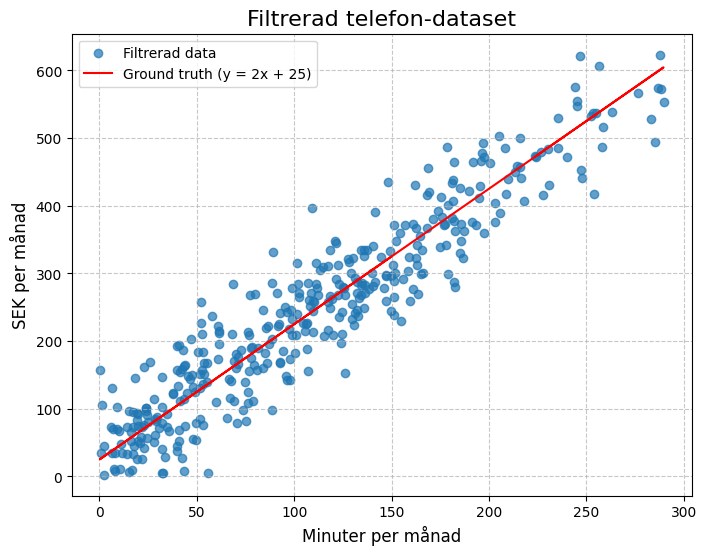

In [74]:

mask = (x <= 300) & (y >= 0)  # Skapa en mask för att filtrera bort outliers
x_filtered = x[mask]  # Filtrera x-värden
y_filtered = y[mask]  # Filtrera y-värden

# Skriv ut längden på de filtrerade värdena
print(f"Längd av x, outliers borttagna: {len(x_filtered)}")
print(f"Längd av y, outliers borttagna: {len(y_filtered)}")

# Rita upp det filtrerade datasetet
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, alpha=0.7, label='Filtrerad data')

# Rita "ground truth" med de sanna parametrarna
plt.plot(x_filtered, 2 * x_filtered + 25, color='red', label='Ground truth (y = 2x + 25)')

plt.title("Filtrerad telefon-dataset", fontsize=16)
plt.xlabel("Minuter per månad", fontsize=12)
plt.ylabel("SEK per månad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

Längd av x, outliers borttagna: 381
Längd av y, outliers borttagna: 381


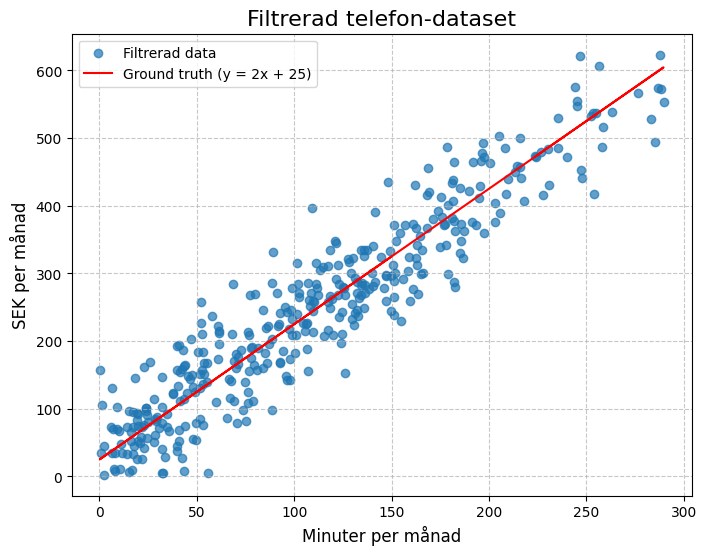

In [75]:
# Filtrera bort outliers
mask = (x <= 300) & (y >= 0)  # Skapa en mask för att filtrera bort outliers
x_filtered = x[mask]  # Filtrera x-värden
y_filtered = y[mask]  # Filtrera y-värden

# Skriv ut längden på de filtrerade värdena
print(f"Längd av x, outliers borttagna: {len(x_filtered)}")
print(f"Längd av y, outliers borttagna: {len(y_filtered)}")



# Rita upp det filtrerade datasetet
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, alpha=0.7, label='Filtrerad data')

# Rita "ground truth" med de sanna parametrarna
plt.plot(x_filtered, 2 * x_filtered + 25, color='red', label='Ground truth (y = 2x + 25)')

plt.title("Filtrerad telefon-dataset", fontsize=16)
plt.xlabel("Minuter per månad", fontsize=12)
plt.ylabel("SEK per månad", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## C

Skapa en databas med värderna

In [76]:
import pandas as pd

# Skapa DataFrame med de filtrerade värdena
df = pd.DataFrame({"Minuter": x_filtered, "SEK": y_filtered})

# Visa de första raderna av DataFrame
df.head()



,Minuter,SEK
0,149.671415,244.621448
1,86.173570,167.378389
2,164.768854,354.799893
3,252.302986,531.955001
4,76.584663,155.666051


## Uppgift 1

### Train / test split

## A

In [77]:
import pandas as pd
import numpy as np

# a) Skapa en funktion för train-test-split med specificerad signatur
def train_test_split(X: pd.DataFrame, y: pd.DataFrame, train_fraction: float = 0.7, random_state: int = 42, replace:bool = False) -> tuple:
    """
    Delar upp data i tränings- och testdata.

    Parametrar:
    - X: DataFrame med oberoende variabler.
    - y: DataFrame med beroende variabler.
    - train_fraction: Andel av data som ska användas för träning (standard är 0.7).
    - random_state: Seed för reproducerbarhet (standard är 42).
    - replace: Om sampling ska ske med ersättning (standard är False).

    Returnerar:
    - En tuple med (X_train, X_test, y_train, y_test).
    """
    # Kontrollera att X och y har samma längd
    if len(X) != len(y):
        raise ValueError("X och y måste ha samma längd")
    
    # Blanda data för att undvika bias
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    
    # Dela upp data i tränings- och testdata
    train_size = int(len(X) * train_fraction)
    X_train = X.iloc[indices[:train_size]]
    X_test = X.iloc[indices[train_size:]]
    y_train = y.iloc[indices[:train_size]]
    y_test = y.iloc[indices[train_size:]]
    
    return (X_train, X_test, y_train, y_test)


## B

In [78]:
# b) Använd funktionen för att dela upp ditt data
# Skapa en DataFrame med de filtrerade värdena
df = pd.DataFrame({'Minutes': x_filtered, 'Cost': y_filtered})

# Dela upp data i tränings- och testdata
X_train, X_test, y_train, y_test = train_test_split(df[['Minutes']], df[['Cost']])

# Skriv ut längden på tränings- och testdata
print(f"Längd av X_train: {len(X_train)}")
print(f"Längd av X_test: {len(X_test)}")
print(f"Längd av y_train: {len(y_train)}")
print(f"Längd av y_test: {len(y_test)}")

# Kontrollera att tränings- och testdata inte överlappar
train_indices = X_train.index
test_indices = X_test.index
overlap = set(train_indices).intersection(set(test_indices))
print(f"Överlappande index mellan tränings- och testdata: {overlap}")


Längd av X_train: 266
Längd av X_test: 115
Längd av y_train: 266
Längd av y_test: 115
Överlappande index mellan tränings- och testdata: set()


## Uppgift 2


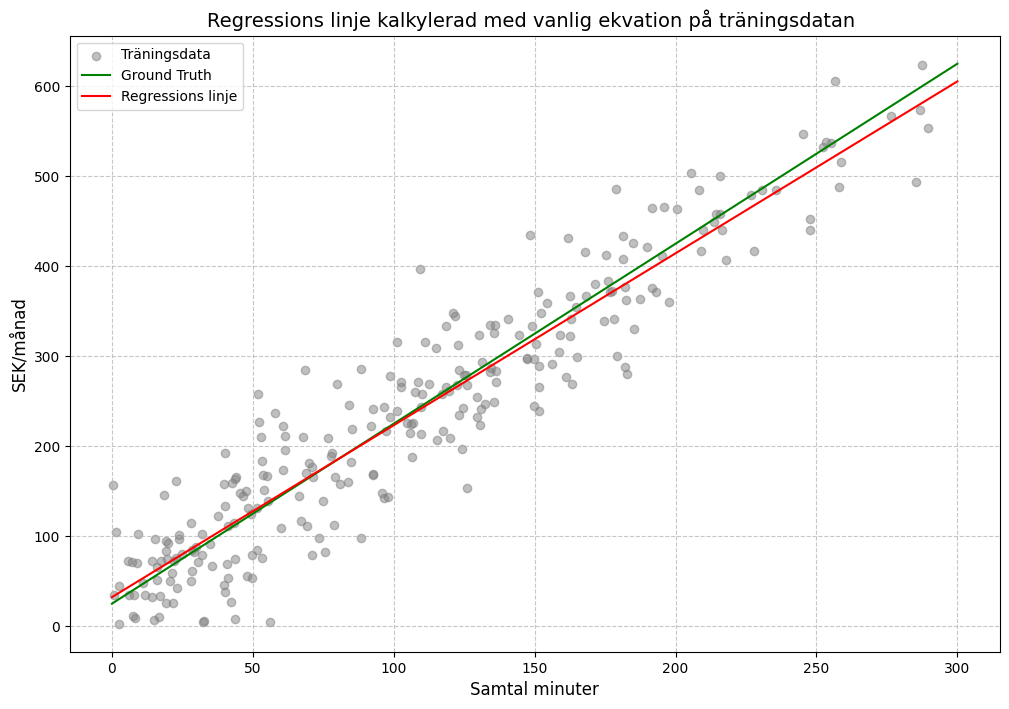

Beräknade koefficienter:
β₀ (intercept): 32.22
β₁ (lutning): 1.91


In [79]:
import numpy as np
import matplotlib.pyplot as plt

# Beräkna koefficienterna med normalformeln
# Lägg till en kolumn med ettor för intercept
X = np.column_stack([np.ones(len(X_train)), X_train['Minutes']])
y = y_train['Cost'].values

# Normalformeln: β = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Skapa prediktioner för plottet
x_plot = np.linspace(0, 300, 100)
y_pred = beta[0] + beta[1] * x_plot

# Skapa plot
plt.figure(figsize=(12, 8))

# Plotta träningsdata
plt.scatter(X_train['Minutes'], y_train['Cost'], alpha=0.5, color='gray', label='Träningsdata')

# Plotta ground truth (y = 2x + 25)
plt.plot(x_plot, 2 * x_plot + 25, color='green', label='Ground Truth')

# Plotta regressionslinjen
plt.plot(x_plot, y_pred, color='red', label='Regressions linje')

# Lägg till labels och titel
plt.title('Regressions linje kalkylerad med vanlig ekvation på träningsdatan ', fontsize=14)
plt.xlabel('Samtal minuter', fontsize=12)
plt.ylabel('SEK/månad', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# Skriv ut de beräknade koefficienterna
print(f"Beräknade koefficienter:")
print(f"β₀ (intercept): {beta[0]:.2f}")
print(f"β₁ (lutning): {beta[1]:.2f}")

## Uppgift 3

## A

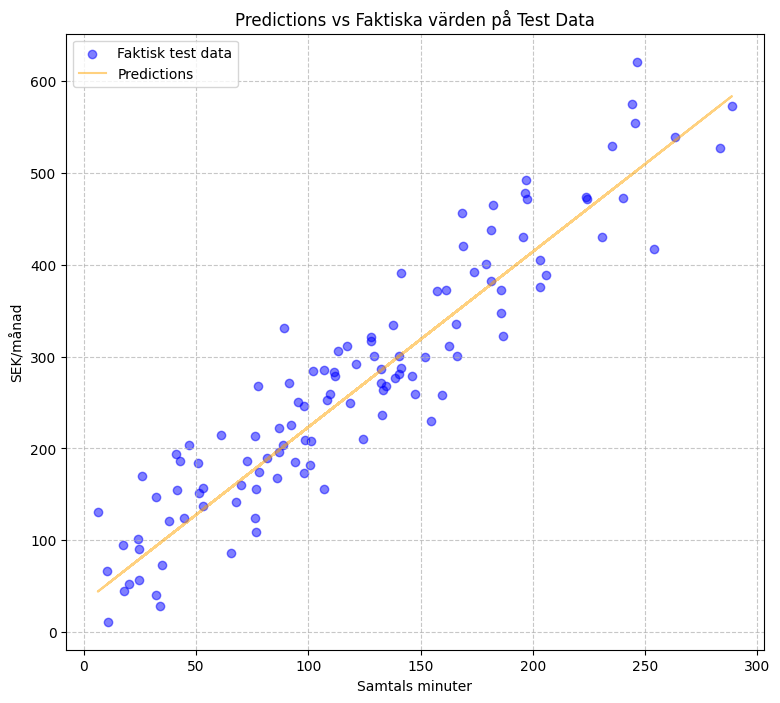

In [80]:
# Skapa design matrix för testdata
X_test_matrix = np.column_stack([np.ones(len(X_test)), X_test['Minutes']])

# Gör prediktioner med våra beräknade beta-koefficienter
y_pred = X_test_matrix @ beta

# Plotta prediktioner och faktiska värden
plt.figure(figsize=(9, 8))
plt.scatter(X_test['Minutes'], y_test['Cost'], color='blue', alpha=0.5, label='Faktisk test data')
plt.plot(X_test['Minutes'], y_pred, color='orange', alpha=0.5, label='Predictions')
plt.title('Predictions vs Faktiska värden på Test Data')
plt.xlabel('Samtals minuter')
plt.ylabel('SEK/månad')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## B

# Förklaring av koden
Del a) 

#### Prediktioner

Skapar design matrix för testdata
Vi skapar en design matrix X_test_matrix med en kolumn av ettor för intercept och en kolumn med minutvärden från testdata.
Gör prediktioner med beta-koefficienter
Vi använder våra beräknade beta-koefficienter (beta) för att göra prediktioner på testdata.
Plottar faktiska värden och prediktioner
Vi plottar både faktiska testvärden (y_test) och prediktioner (y_pred) för att visualisera modellens prestanda.


Del b) 

#### Utvärderingsmått

MAE (Mean Absolute Error)
Genomsnittligt absolut fel
Beräknar det genomsnittliga absoluta felet mellan faktiska värden och prediktioner.
Mindre känslig för outliers
MAE är mindre känslig för extrema värden jämfört med MSE.

#### MSE (Mean Squared Error)

Genomsnittligt kvadratfel
Beräknar det genomsnittliga kvadratiska felet.
Straffar stora fel hårdare
MSE straffar stora fel mer än MAE.

#### RMSE (Root Mean Squared Error)

Roten ur MSE
Beräknar roten ur MSE.
Fel i samma enhet som data
RMSE ger ett fel i samma enhet som originaldata, vilket gör det lättare att tolka.

In [81]:
# b) Beräkna MAE, MSE, RMSE
def mae(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Beräknar Mean Absolute Error"""
    return np.mean(np.abs(y_true - y_pred))

def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Beräknar Mean Squared Error"""
    return np.mean((y_true - y_pred) ** 2)

def rmse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    """Beräknar Root Mean Squared Error"""
    return np.sqrt(mse(y_true, y_pred))

# Konvertera till numpy arrays för att undvika dimensionsproblem
y_test_values = y_test['Cost'].values
y_pred = y_pred.flatten()  # Säkerställ att y_pred har rätt dimension

# Beräkna utvärderingsmåtten
mae_score = mae(y_test_values, y_pred)
mse_score = mse(y_test_values, y_pred)
rmse_score = rmse(y_test_values, y_pred)

print("Utvärderingsmått på testdata:")
print(f"MAE: {mae_score:.2f}")
print(f"MSE: {mse_score:.2f}")
print(f"RMSE: {rmse_score:.2f}")

Utvärderingsmått på testdata:
MAE: 40.12
MSE: 2401.58
RMSE: 49.01


## Uppgift 4


## A

In [82]:
import numpy as np
import pandas as pd

# Sätt seed för reproducerbarhet
np.random.seed(42)

# Antal sampel
n_samples = 10000

# Simulera x_1, x_2, x_3
x_1 = np.abs(np.random.normal(100, np.sqrt(100), n_samples))  # |𝒩(100, 100)|
x_2 = np.random.uniform(0, 50, n_samples)  # 𝒰(0, 50)
x_3 = np.abs(np.random.normal(0, 2, n_samples))  # |𝒩(0, 2)|

# Simulera feltermen ε ~ 𝒩(0, 50)
epsilon = np.random.normal(0, 50, n_samples)

# Beräkna y enligt modellen
y = 25 + 2 * x_1 + 0.5 * x_2 + 50 * x_3 + epsilon

# Skapa DataFrame
data = pd.DataFrame({'x_1': x_1, 'x_2': x_2, 'x_3': x_3, 'y': y})

# Lägg till intercept-kolumn med ettor
data['intercept'] = 1

# Skapa DataFrame med önskade kolumner
df = pd.DataFrame({
    'Intercept': data['intercept'],
    'Minuter': data['x_1'],
    'SMS': data['x_2'],
    'Surf (GB)': data['x_3'],
    'Kostnad': data['y']
})

# Visa de första raderna av DataFrame
# Kombinera första och sista rader i en snygg utskrift
print(pd.concat([df.head(2), pd.DataFrame([['...']*len(df.columns)], columns=df.columns), df.tail(2)]))

     Intercept     Minuter        SMS Surf (GB)     Kostnad
0            1  104.967142  16.062759  0.958919  307.853958
1            1   98.617357    5.15096  2.056136  307.772968
0          ...         ...        ...       ...         ...
9998         1  104.957656  37.691313  1.013816  368.795384
9999         1  106.443885  44.067762   3.16303    428.9165


## B

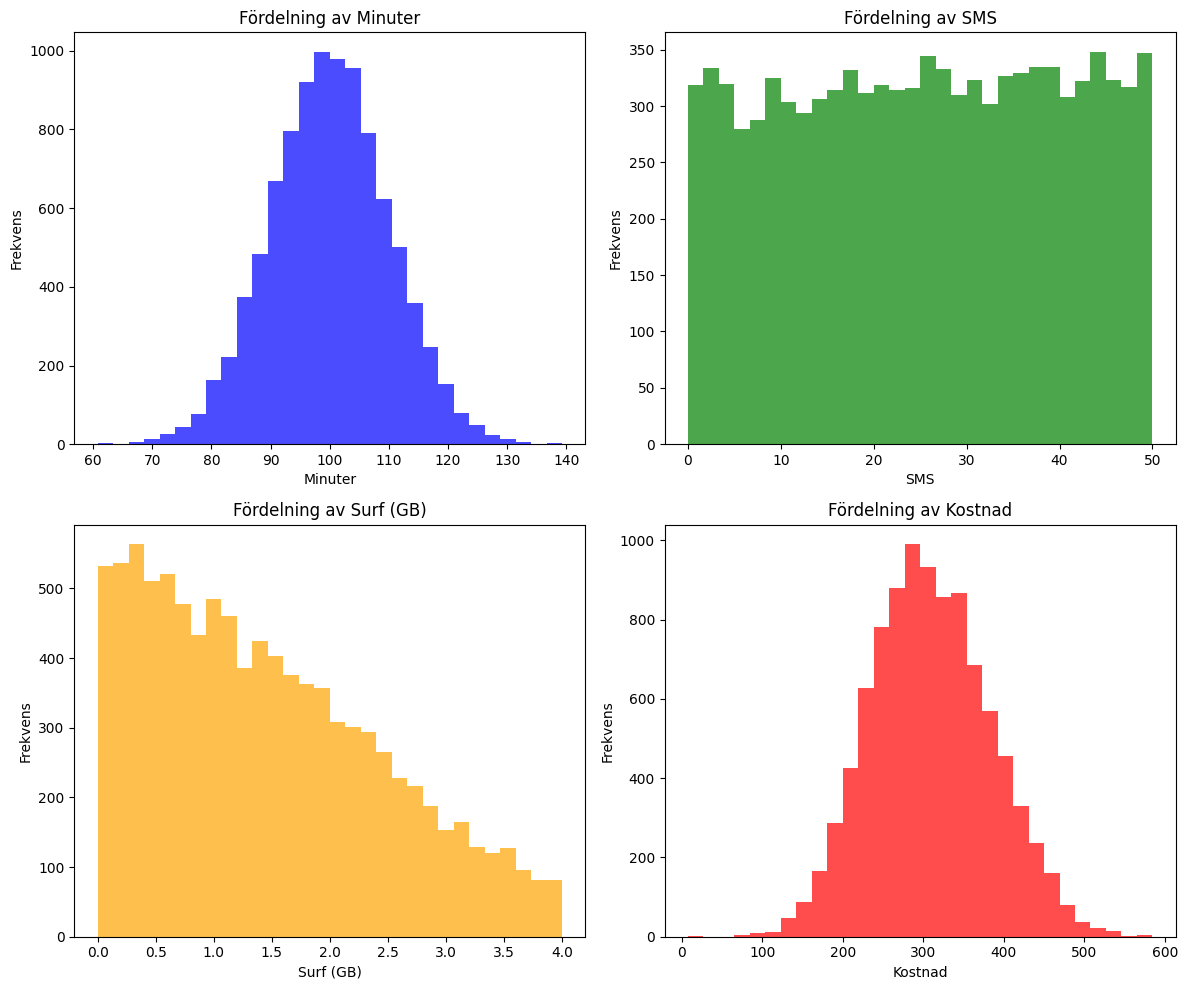

Antal rader före filtrering: 10000
Antal rader efter filtrering: 9580
Procent av data som behållits: 95.80%


In [84]:
import matplotlib.pyplot as plt

# Skapa mask för filtrering
mask = (data['x_3'] < 4) & (data['x_1'] < 300) & (data['y'] > 0)
filtered_data = data[mask]

# Skapa en figur med 4 subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Rita histogram för x_1 (Minuter)
axes[0, 0].hist(filtered_data['x_1'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Fördelning av Minuter')
axes[0, 0].set_xlabel('Minuter')
axes[0, 0].set_ylabel('Frekvens')

# Rita histogram för x_2 (SMS)
axes[0, 1].hist(filtered_data['x_2'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('Fördelning av SMS')
axes[0, 1].set_xlabel('SMS')
axes[0, 1].set_ylabel('Frekvens')

# Rita histogram för x_3 (Surf (GB))
axes[1, 0].hist(filtered_data['x_3'], bins=30, color='orange', alpha=0.7)
axes[1, 0].set_title('Fördelning av Surf (GB)')
axes[1, 0].set_xlabel('Surf (GB)')
axes[1, 0].set_ylabel('Frekvens')

# Rita histogram för y (Kostnad)
axes[1, 1].hist(filtered_data['y'], bins=30, color='red', alpha=0.7)
axes[1, 1].set_title('Fördelning av Kostnad')
axes[1, 1].set_xlabel('Kostnad')
axes[1, 1].set_ylabel('Frekvens')

# Justera layouten
plt.tight_layout()

# Visa figurerna
plt.show()

# Visa antal rader före och efter filtrering
print(f"Antal rader före filtrering: {len(data)}")
print(f"Antal rader efter filtrering: {len(filtered_data)}")
print(f"Procent av data som behållits: {(len(filtered_data)/len(data))*100:.2f}%")

## Uppgift 5

## A

In [85]:
import numpy as np

# df = pd.DataFrame({'Minuter': x_filtered, 'Kostnad': y_filtered})

# Blanda datan för att säkerställa att den är slumpmässigt fördelad
df = df.sample(frac=1, random_state=42)

# Beräkna antalet rader för träningsdata
train_size = int(0.8 * len(df))

# Dela upp datan i tränings- och testset
X_train = df[['Minuter']].iloc[:train_size]
X_test = df[['Minuter']].iloc[train_size:]
y_train = df[['Kostnad']].iloc[:train_size]
y_test = df[['Kostnad']].iloc[train_size:]

# Skriv ut längden på tränings- och testdata
print(f"Längd av X_train: {len(X_train)}")
print(f"Längd av X_test: {len(X_test)}")
print(f"Längd av y_train: {len(y_train)}")
print(f"Längd av y_test: {len(y_test)}")

# Kontrollera att tränings- och testdata inte överlappar
train_indices = X_train.index
test_indices = X_test.index
overlap = set(train_indices).intersection(set(test_indices))
print(f"Överlappande index mellan tränings- och testdata: {overlap}")

Längd av X_train: 8000
Längd av X_test: 2000
Längd av y_train: 8000
Längd av y_test: 2000
Överlappande index mellan tränings- och testdata: set()


## B

In [86]:
import numpy as np

# Lägg till en kolumn med ettor för interceptet
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Beräkna koefficienterna med normalekvationen
beta_hat = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

print(f"Beräknade koefficienter (beta_hat): {beta_hat}")

Beräknade koefficienter (beta_hat):       Kostnad
0  117.080377
1    1.991683


## C

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Lägg till en kolumn med ettor för interceptet i testdatan
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Gör förutsägelser på testdatan
y_pred = X_test_b @ beta_hat

# Beräkna MAE, MSE och RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 63.905248816391875
Mean Squared Error (MSE): 6442.205658183145
Root Mean Squared Error (RMSE): 80.26335189975026
